🏦 BANK MARKETING DECISION TREE CLASSIFIER
📊 Predicting Customer Purchase Behavior
✅ Dataset loaded successfully!
📊 Dataset Shape: 41188 rows, 20 columns

📋 DATA EXPLORATION

🔍 First 5 rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1 

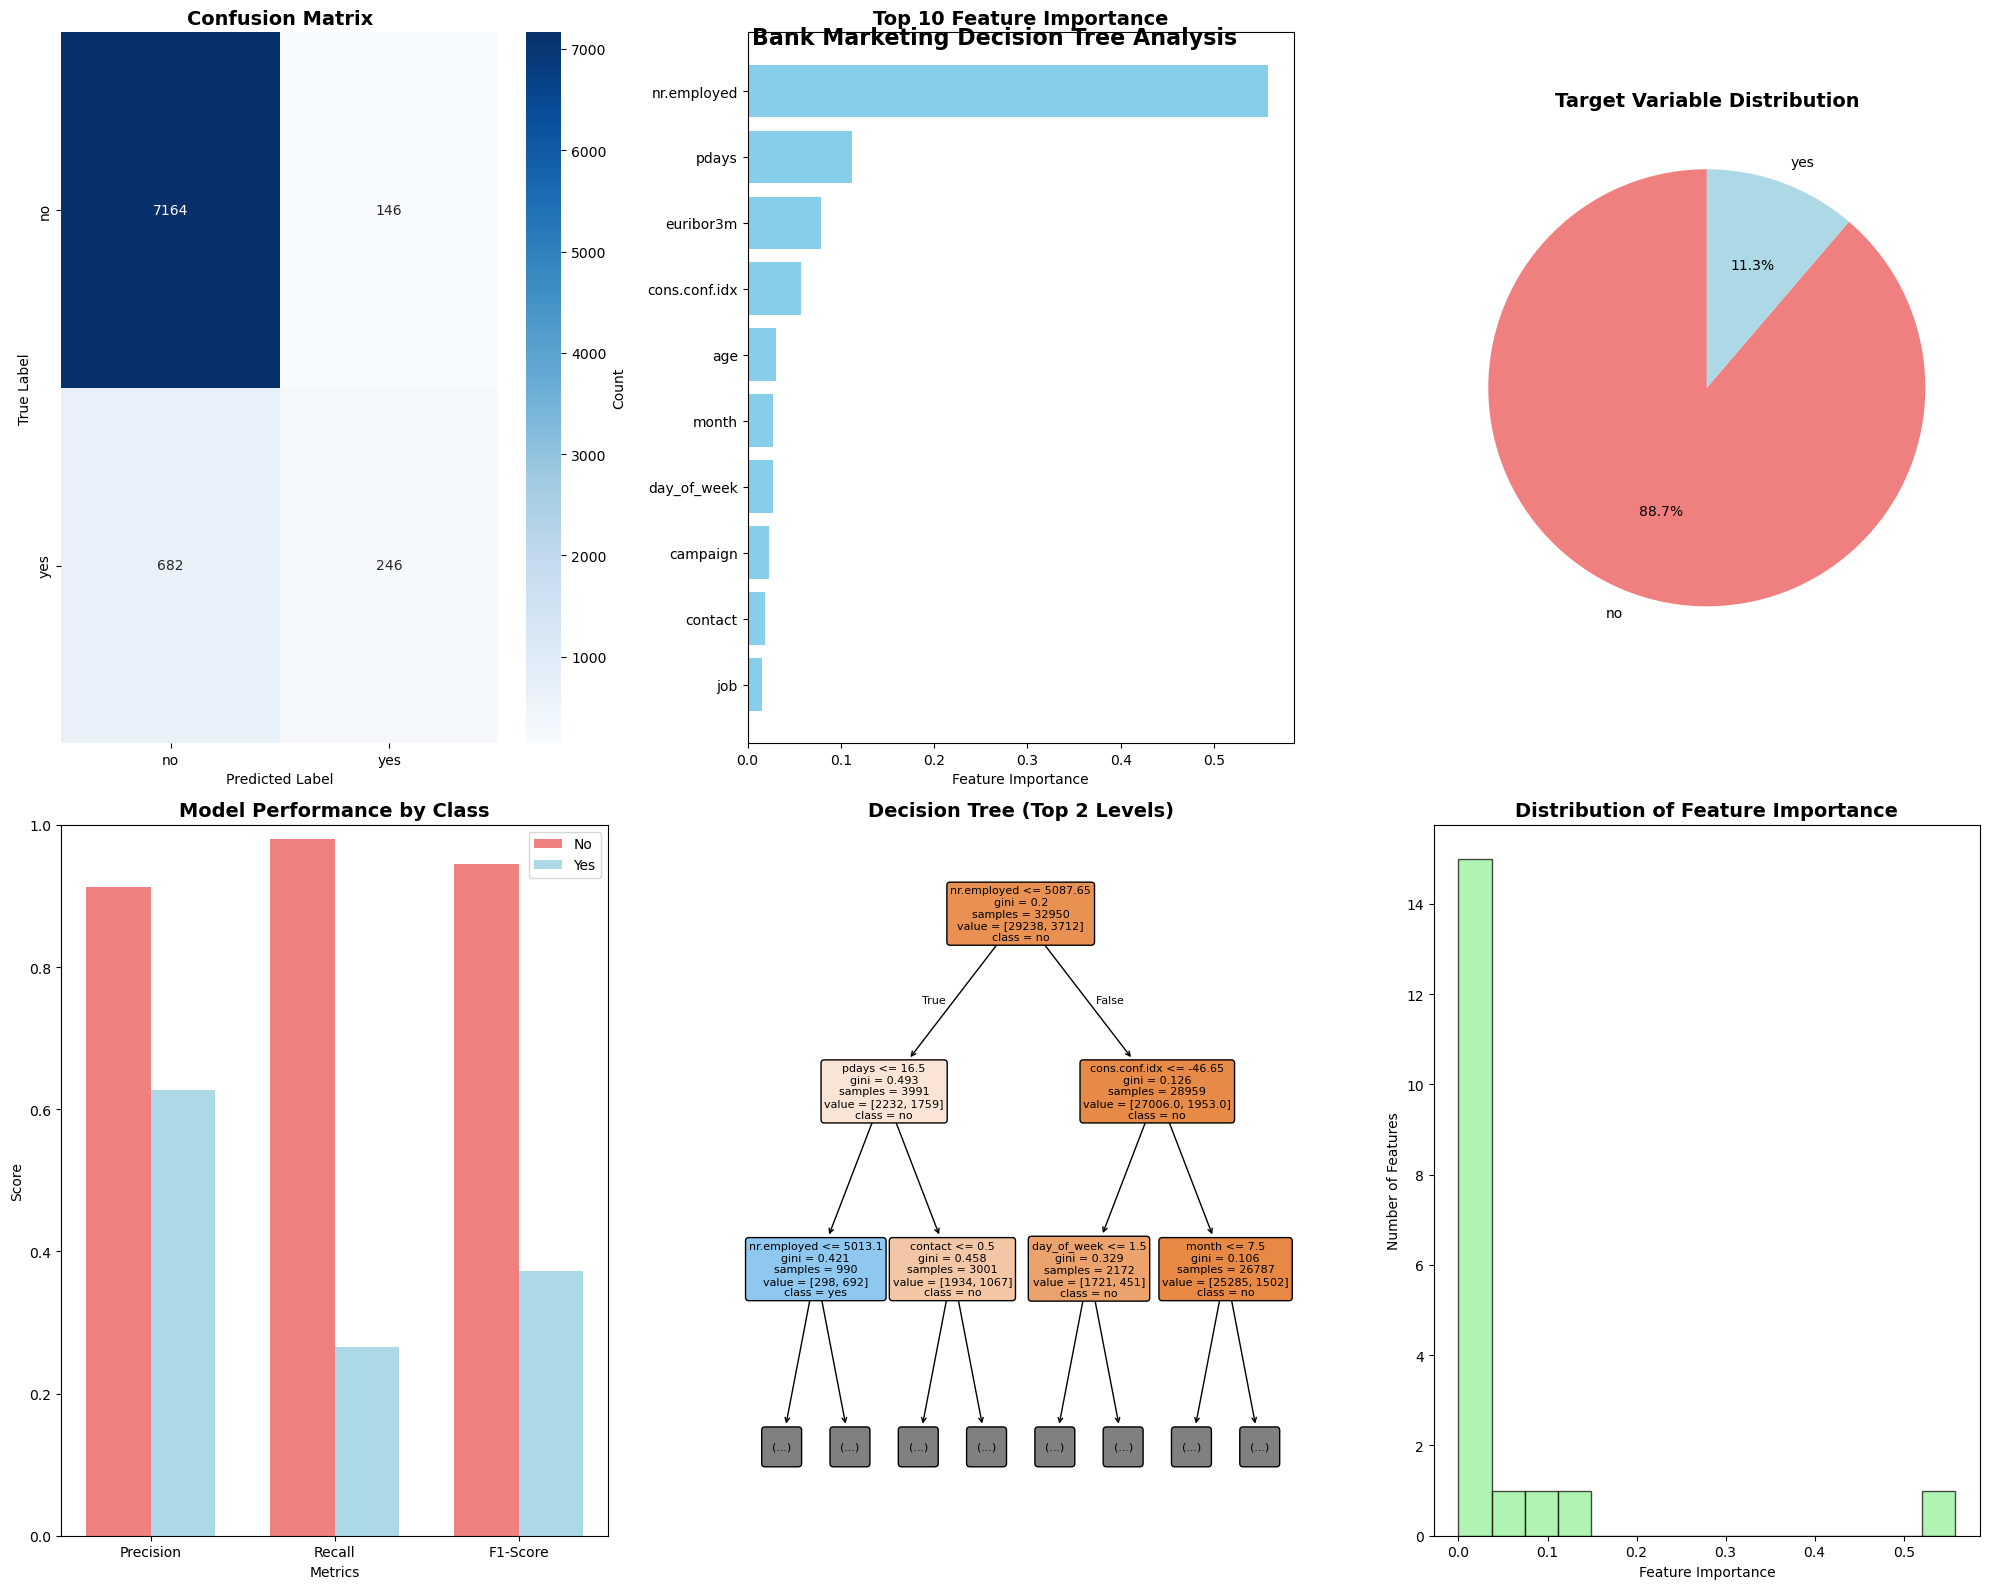


🔮 SAMPLE CUSTOMER PREDICTIONS
🧑‍💼 Analyzing sample customers from test set:

👤 Customer 1:
   Prediction: NO (Confidence: 95.5%)
   Actual: NO
   Status: ✅ CORRECT
   Key Features:
     • nr.employed: 5228.1
     • pdays: 999.0
     • euribor3m: 4.961

👤 Customer 2:
   Prediction: YES (Confidence: 52.9%)
   Actual: YES
   Status: ✅ CORRECT
   Key Features:
     • nr.employed: 4963.6
     • pdays: 2.0
     • euribor3m: 1.048

👤 Customer 3:
   Prediction: NO (Confidence: 95.9%)
   Actual: NO
   Status: ✅ CORRECT
   Key Features:
     • nr.employed: 5099.1
     • pdays: 999.0
     • euribor3m: 1.344

👤 Customer 4:
   Prediction: NO (Confidence: 95.3%)
   Actual: NO
   Status: ✅ CORRECT
   Key Features:
     • nr.employed: 5195.8
     • pdays: 999.0
     • euribor3m: 4.191

👤 Customer 5:
   Prediction: NO (Confidence: 86.0%)
   Actual: NO
   Status: ✅ CORRECT
   Key Features:
     • nr.employed: 5099.1
     • pdays: 999.0
     • euribor3m: 1.25

💡 BUSINESS INSIGHTS & RECOMMENDATIONS
🎯 Key

In [3]:
# 🏦 BANK MARKETING DECISION TREE CLASSIFIER
# SkillCraft Technology Internship Project
# Predicting Customer Purchase Behavior using Decision Trees

# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("🏦 BANK MARKETING DECISION TREE CLASSIFIER")
print("=" * 60)
print("📊 Predicting Customer Purchase Behavior")
print("=" * 60)

# 📥 Load the Bank Marketing Dataset
try:
    df = pd.read_csv("bank-direct-marketing-campaigns.csv")
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("❌ Dataset file not found. Please ensure 'bank-direct-marketing-campaigns.csv' is in the current directory.")
    print("📥 You can download it from: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets")
    exit()

# 👀 Data Exploration
print("\n" + "="*50)
print("📋 DATA EXPLORATION")
print("="*50)

print("\n🔍 First 5 rows of the dataset:")
print(df.head())

print(f"\n📊 Dataset Information:")
print(f"• Total Records: {df.shape[0]:,}")
print(f"• Total Features: {df.shape[1]:,}")
print(f"• Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🎯 Target Variable Distribution:")
target_counts = df['y'].value_counts()
target_pct = df['y'].value_counts(normalize=True) * 100
for value, count in target_counts.items():
    print(f"• {value}: {count:,} ({target_pct[value]:.1f}%)")

print(f"\n🔍 Missing Values Check:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_values[missing_values > 0])

print(f"\n📊 Feature Types:")
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'y' in categorical_features:
    categorical_features.remove('y')

print(f"• Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"• Numerical Features ({len(numerical_features)}): {numerical_features}")

# 🔄 Data Preprocessing
print("\n" + "="*50)
print("🔧 DATA PREPROCESSING")
print("="*50)

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Encode categorical variables
print("🔤 Encoding categorical variables...")
label_encoders = {}
X_encoded = X.copy()

for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"  ✓ {col}: {len(le.classes_)} categories")

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
print(f"🎯 Target encoded: {target_encoder.classes_}")

# 🔪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print(f"\n📊 Data Split:")
print(f"• Training Set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"• Test Set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# 🌳 Build Decision Tree Model
print("\n" + "="*50)
print("🌳 BUILDING DECISION TREE MODEL")
print("="*50)

# Create and train the decision tree
dt_classifier = DecisionTreeClassifier(
    max_depth=8,              # Optimal depth to prevent overfitting
    min_samples_split=20,     # Minimum samples required to split
    min_samples_leaf=10,      # Minimum samples in leaf node
    criterion='gini',         # Splitting criterion
    random_state=42
)

print("🔧 Training Decision Tree Classifier...")
dt_classifier.fit(X_train, y_train)
print("✅ Model training completed!")

# Make predictions
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)

# 📊 Model Evaluation
print("\n" + "="*50)
print("📈 MODEL PERFORMANCE EVALUATION")
print("="*50)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\n📊 Confusion Matrix:")
print("    Predicted")
print("      No   Yes")
print(f"No   {cm[0][0]:4d} {cm[0][1]:4d}")
print(f"Yes  {cm[1][0]:4d} {cm[1][1]:4d}")

# Classification Report
print(f"\n📋 Detailed Classification Report:")
class_report = classification_report(y_test, y_pred, target_names=target_encoder.classes_, output_dict=True)
print(f"{'Class':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
print("-" * 55)
for class_name in target_encoder.classes_:
    metrics = class_report[class_name]
    print(f"{class_name:<10} {metrics['precision']:<10.3f} {metrics['recall']:<10.3f} "
          f"{metrics['f1-score']:<10.3f} {metrics['support']:<10.0f}")

print(f"\nMacro Avg  {class_report['macro avg']['precision']:<10.3f} "
      f"{class_report['macro avg']['recall']:<10.3f} "
      f"{class_report['macro avg']['f1-score']:<10.3f} {class_report['macro avg']['support']:<10.0f}")

# 🎯 Feature Importance Analysis
print("\n" + "="*50)
print("🔍 FEATURE IMPORTANCE ANALYSIS")
print("="*50)

feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("🏆 Top 10 Most Important Features:")
print(f"{'Rank':<5} {'Feature':<15} {'Importance':<12} {'Bar Chart'}")
print("-" * 50)
for i, (idx, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):
    bar = "█" * int(row['Importance'] * 100)
    print(f"{i:<5} {row['Feature']:<15} {row['Importance']:<12.4f} {bar}")

# 🌳 Decision Tree Rules
print("\n" + "="*50)
print("🌳 DECISION TREE RULES (Top 3 Levels)")
print("="*50)

tree_rules = export_text(dt_classifier, 
                        feature_names=list(X_encoded.columns),
                        max_depth=3)
print(tree_rules)

# 📊 Create Visualizations
print("\n" + "="*50)
print("📊 CREATING VISUALIZATIONS")
print("="*50)

# Set up the plotting style
plt.style.use('default')
fig = plt.figure(figsize=(20, 16))

# 1. Confusion Matrix Heatmap
plt.subplot(2, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 2. Feature Importance Plot
plt.subplot(2, 3, 2)
top_10_features = feature_importance_df.head(10)
plt.barh(range(len(top_10_features)), top_10_features['Importance'], color='skyblue')
plt.yticks(range(len(top_10_features)), top_10_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# 3. Target Distribution
plt.subplot(2, 3, 3)
target_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')

# 4. Model Performance Metrics
plt.subplot(2, 3, 4)
metrics = ['Precision', 'Recall', 'F1-Score']
no_scores = [class_report['no']['precision'], class_report['no']['recall'], class_report['no']['f1-score']]
yes_scores = [class_report['yes']['precision'], class_report['yes']['recall'], class_report['yes']['f1-score']]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, no_scores, width, label='No', color='lightcoral')
plt.bar(x + width/2, yes_scores, width, label='Yes', color='lightblue')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance by Class', fontsize=14, fontweight='bold')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

# 5. Decision Tree Visualization (simplified)
plt.subplot(2, 3, 5)
plot_tree(dt_classifier, 
          max_depth=2,  # Show only top 2 levels for clarity
          filled=True, 
          feature_names=X_encoded.columns, 
          class_names=target_encoder.classes_,
          fontsize=8,
          rounded=True)
plt.title('Decision Tree (Top 2 Levels)', fontsize=14, fontweight='bold')

# 6. Feature Importance Distribution
plt.subplot(2, 3, 6)
plt.hist(feature_importance_df['Importance'], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
plt.xlabel('Feature Importance')
plt.ylabel('Number of Features')
plt.title('Distribution of Feature Importance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.suptitle('Bank Marketing Decision Tree Analysis', fontsize=16, fontweight='bold', y=0.98)
plt.show()

# 🔮 Sample Predictions
print("\n" + "="*50)
print("🔮 SAMPLE CUSTOMER PREDICTIONS")
print("="*50)

# Select 5 random samples from test set
sample_indices = np.random.choice(len(X_test), 5, replace=False)

print("🧑‍💼 Analyzing sample customers from test set:")
print()

for i, idx in enumerate(sample_indices, 1):
    sample_features = X_test.iloc[idx]
    actual_label = target_encoder.classes_[y_test[idx]]  # Fixed: removed .iloc
    predicted_label = target_encoder.classes_[y_pred[idx]]
    confidence = y_pred_proba[idx].max() * 100
    
    print(f"👤 Customer {i}:")
    print(f"   Prediction: {predicted_label.upper()} (Confidence: {confidence:.1f}%)")
    print(f"   Actual: {actual_label.upper()}")
    print(f"   Status: {'✅ CORRECT' if predicted_label == actual_label else '❌ INCORRECT'}")
    
    # Show key feature values (top 3 most important)
    top_3_features = feature_importance_df.head(3)['Feature'].values
    print(f"   Key Features:")
    for feature in top_3_features:
        value = sample_features[feature]
        if feature in label_encoders:
            # Decode categorical features
            try:
                decoded_value = label_encoders[feature].inverse_transform([value])[0]
                print(f"     • {feature}: {decoded_value}")
            except:
                print(f"     • {feature}: {value}")
        else:
            print(f"     • {feature}: {value}")
    print()

# 📈 Business Insights
print("=" * 60)
print("💡 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

top_features = feature_importance_df.head(5)['Feature'].values
print(f"🎯 Key Success Factors:")
for i, feature in enumerate(top_features, 1):
    importance = feature_importance_df[feature_importance_df['Feature'] == feature]['Importance'].iloc[0]
    print(f"   {i}. {feature.title()} (Importance: {importance:.3f})")

print(f"\n📊 Model Performance Summary:")
print(f"   • Overall Accuracy: {accuracy*100:.1f}%")
print(f"   • Precision (Yes): {class_report['yes']['precision']*100:.1f}%")
print(f"   • Recall (Yes): {class_report['yes']['recall']*100:.1f}%")
print(f"   • F1-Score (Yes): {class_report['yes']['f1-score']*100:.1f}%")


# 💾 Save Results Summary
results_summary = {
    'Model': 'Decision Tree Classifier',
    'Dataset_Size': df.shape[0],
    'Features': df.shape[1] - 1,
    'Accuracy': f"{accuracy:.4f}",
    'Precision_Yes': f"{class_report['yes']['precision']:.4f}",
    'Recall_Yes': f"{class_report['yes']['recall']:.4f}",
    'F1_Score_Yes': f"{class_report['yes']['f1-score']:.4f}",
    'Top_Feature': feature_importance_df.iloc[0]['Feature'],
    'Top_Feature_Importance': f"{feature_importance_df.iloc[0]['Importance']:.4f}"
}

